In [1]:
import scipy.io
import numpy as np
from PIL import Image
import pandas as pd
from pathlib import Path
import random
import shutil
import os

random.seed(42)

In [3]:
DATA_PATH = Path("../data")
IMAGES_DIR = Path("Images")
IMAGES_PATH = DATA_PATH / IMAGES_DIR
DATA_INFO_PATH = DATA_PATH / Path("file_list.mat")

In [4]:
mat = scipy.io.loadmat(DATA_INFO_PATH)
print(mat)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct  9 08:29:09 2011', '__version__': '1.0', '__globals__': [], 'file_list': array([[array(['n02085620-Chihuahua/n02085620_10074.jpg'], dtype='<U39')],
       [array(['n02085620-Chihuahua/n02085620_10131.jpg'], dtype='<U39')],
       [array(['n02085620-Chihuahua/n02085620_10621.jpg'], dtype='<U39')],
       ...,
       [array(['n02116738-African_hunting_dog/n02116738_9829.jpg'], dtype='<U48')],
       [array(['n02116738-African_hunting_dog/n02116738_9844.jpg'], dtype='<U48')],
       [array(['n02116738-African_hunting_dog/n02116738_9924.jpg'], dtype='<U48')]],
      dtype=object), 'annotation_list': array([[array(['n02085620-Chihuahua/n02085620_10074'], dtype='<U35')],
       [array(['n02085620-Chihuahua/n02085620_10131'], dtype='<U35')],
       [array(['n02085620-Chihuahua/n02085620_10621'], dtype='<U35')],
       ...,
       [array(['n02116738-African_hunting_dog/n02116738_9829'], dtype='<U44')],
       [array([

In [5]:
file_names = [file[0][0].split("/")[1] for file in mat['file_list']]
race_names = np.array([file[0][0].split("-")[1].split("/")[0].lower() for file in mat['file_list']])

file idx: n02091032_10984.jpg, race: italian_greyhound


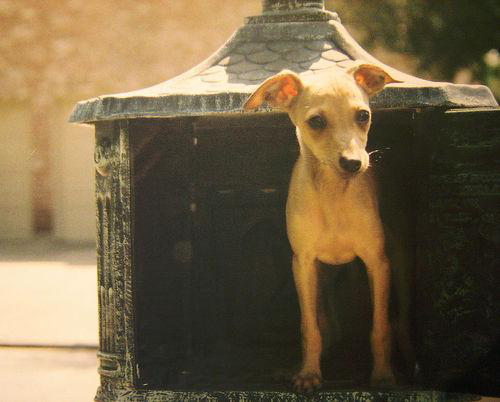

file idx: n02086240_3489.jpg, race: shih


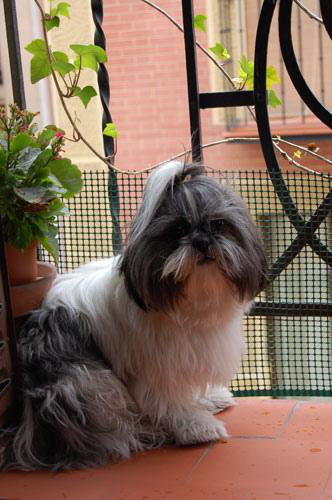

file idx: n02097474_904.jpg, race: tibetan_terrier


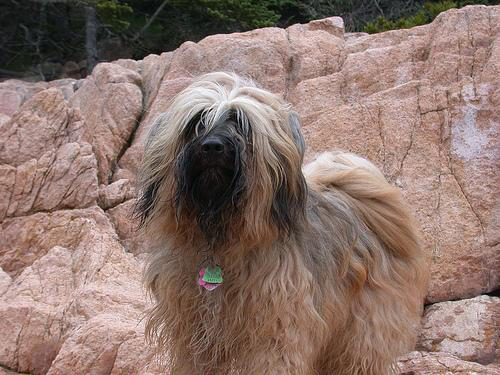

file idx: n02096585_1207.jpg, race: boston_bull


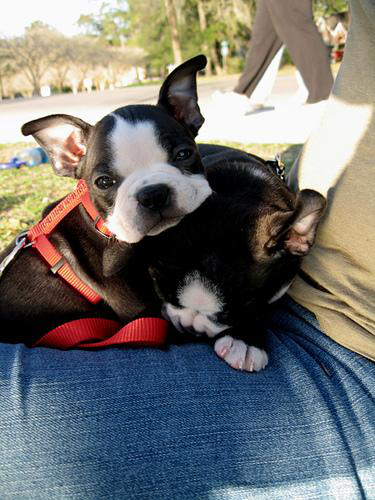

file idx: n02096051_4220.jpg, race: airedale


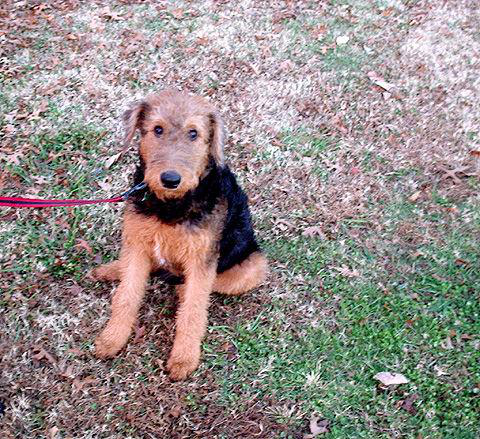

In [6]:
for _ in range(5):
    idx = random.randint(0,len(file_names))
    print(f"file idx: {file_names[idx]}, race: {race_names[idx]}")
    im = Image.open(IMAGES_PATH/file_names[idx])
    display(im)

In [120]:
races_in_dataset = 120
train_ratio = 0.8
valid_ratio = 0.1
test_ratio = 1 - train_ratio - valid_ratio # = 0.1

train, valid, test = [{"filename": [], "race": []} for _ in range(3)]

for race_name in np.unique(race_names)[:races_in_dataset]:
    selected = race_names==race_name
    indices = [idx for idx, chosen in enumerate(selected) if chosen]
    first, last = indices[0], indices[-1]
    random.shuffle(indices)
    
    train_idx, test_idx = first+int(len(indices)*train_ratio), first+int(len(indices)*(train_ratio+valid_ratio))
    train["filename"].extend(file_names[first:train_idx])
    train["race"].extend(race_names[first:train_idx])
    valid["filename"].extend(file_names[train_idx:test_idx])
    valid["race"].extend(race_names[train_idx:test_idx])    
    test["filename"].extend(file_names[test_idx:last+1])
    test["race"].extend(race_names[test_idx:last+1])

In [121]:
train_df = pd.DataFrame(train, columns=train.keys())
train_df.to_csv(DATA_PATH/"train.csv")

valid_df = pd.DataFrame(valid, columns=valid.keys())
valid_df.to_csv(DATA_PATH/"valid.csv")

test_df = pd.DataFrame(test, columns=test.keys())
test_df.to_csv(DATA_PATH/"test.csv")

In [129]:
races_count = {}
for race_name in np.unique(race_names):
    selected = race_names==race_name
    indices = [idx for idx, chosen in enumerate(selected) if chosen]
    races_count[race_name] = len(indices)

In [132]:
import matplotlib.pyplot as plt

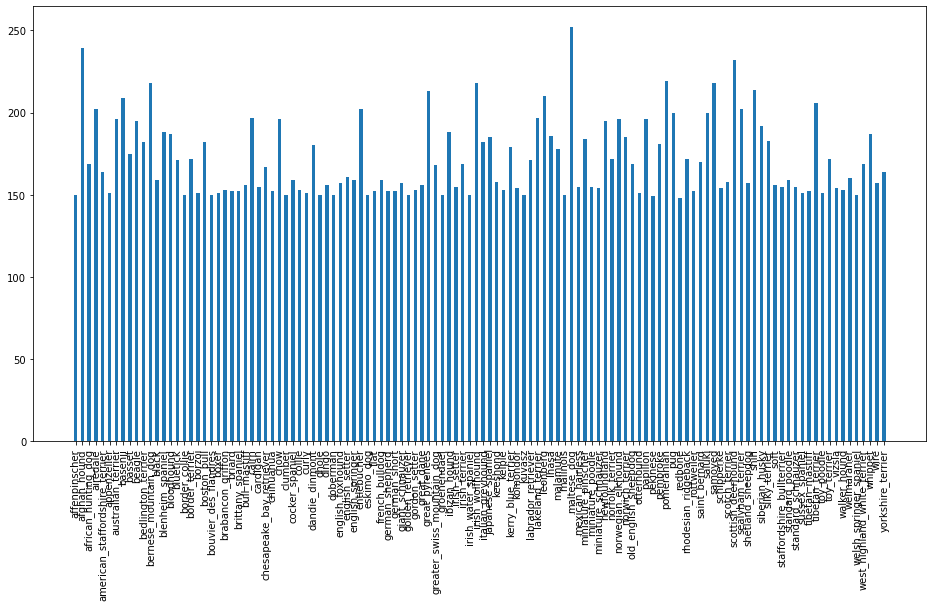

In [150]:
plt.figure(figsize=(16,8))
plt.bar(list(races_count.keys()), list(races_count.values()), width = 0.5)
plt.xticks(rotation=90)
plt.show()